# Probabilités et Statistique 
Cours 1/3

Dimitri de Smet d'Olbecke

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('talk')

## Plan
- Introduction
- Variable Aléatoire
- Principes de probabilités
- Quelques distributions
- Espérance mathématique
- Estimateurs d'une distribution
- Distributions multivariées
- Probabilités conditionnelles
- Probabilité marginale
- Régressions


# Probabilités et Statistiques

- Probabilités : 
    - Branche des mathématiques qui étudie les phénomènes aléatoires 
    - Calcul les "chances" de survenue d'un évènement
- la statistique
    - Disciplines qui étudient les phénomènes à travers 
        - la collecte de données
        - leur traitement
        - leur analyse
        - l'interprétation des résultats
        - leur présentation
- statistiques (pl.) :
    résultat d'une suite d'opérations appliquées à un ensemble de nombres appelé échantillon. 


# Probabilités et Statistiques

"Parmi les thèmes à propos desquels les statisticiens ne sont pas d'accord, se trouve la définition de leur science."

― Maurice Kendall, 1935

Retenons à ce stade :
- Probabilités + Statistique : Les sciences du hasard

# Intérêt des sciences du hasard
"It's tough to make predictions, especially about the future."
― Yogi Berra

# Intérêt des sciences du hasard
(dans les entreprises)
- Que peut-on apprendre des données ?  
- Quelles prédictions permettent-elles ? 
- Avec quel degré de certitude ? 
- Quels gains de productivité peuvent-elle amener ? 
- Peuvent-elles nous aider à mieux cerner des utilisateurs ou des clients ?
- Minimiser la part d'incertitudes sur l'avenir.

# Intérêt des sciences du hasard
(en ce qui vous concerne)
- Explosion des volumes de données
- Retombées économiques
- Part grandissantes dans les métiers de l'informatique
- Mener à bien son projet de passerelle

# Statistique
- Rappels
    - Moyenne
    - Médianne
    - Mode
    - Écart-type
    - Quartile
- Calculs avec le jeu de données sur l'ozone (température à Sandburg en °C)
    - Réimplémentez les fonctions, vérifiez avec numpy.mean(), numpy.median(), ...
    - Dressez les diagrammes suivants 
        - boite à moustache (boxplot)
        - histogramme
        - histogramme cumulé

In [2]:
import pandas as pd
import json
df = pd.read_csv('data/data.csv')
with open('data/variables.json', 'r') as f:
    names = json.load(f)


92.0

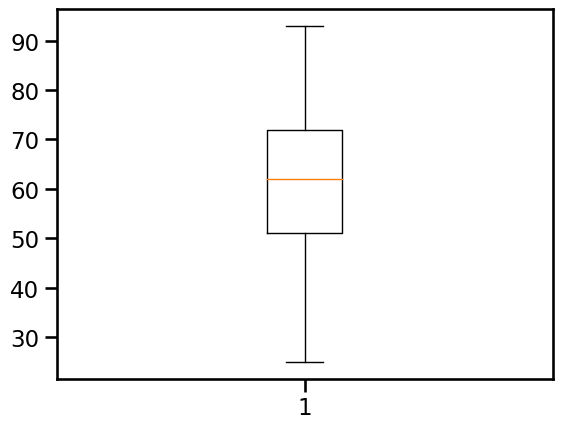

In [3]:
ts = df.tS.dropna().values
import numpy as np
np.quantile(q=0,a=ts)
import matplotlib.pyplot as plt
plt.boxplot(ts);
np.percentile(q=99,a=ts)

In [4]:
names

['month',
 'day_of_month',
 'day_of_week (1=Monday)',
 'ozone [pphm]',
 '500 millibar pressure height (m) measured at Vandenberg AFB',
 'Wind speed (mph) at Los Angeles International Airport (LAX)',
 'humidity (%) at LAX',
 'temp. Sandburg [F]',
 'temp.  El Monte [F]',
 'Inversion Base Height (feet)',
 'Pressure gradient (mm Hg) from LAX to Daggett, CA',
 'Inversion base temperature (degrees F) at LAX',
 'Visibility measured at LAX [miles]']

## Exemple 1D

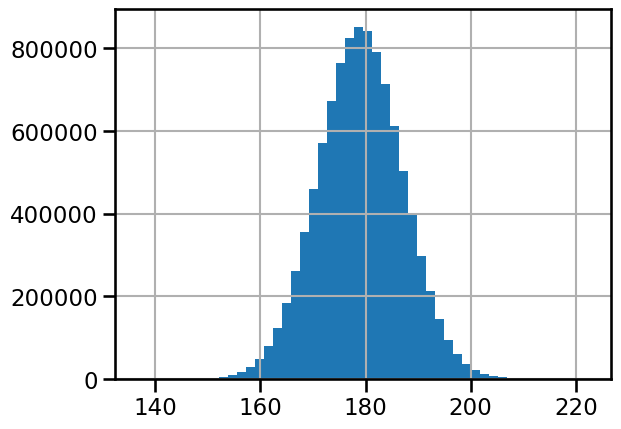

In [5]:
# Taille d'une population en cm
x = np.random.normal(size=int(10e6),loc=179,scale=8)
plt.hist(x,bins=50);
plt.grid()



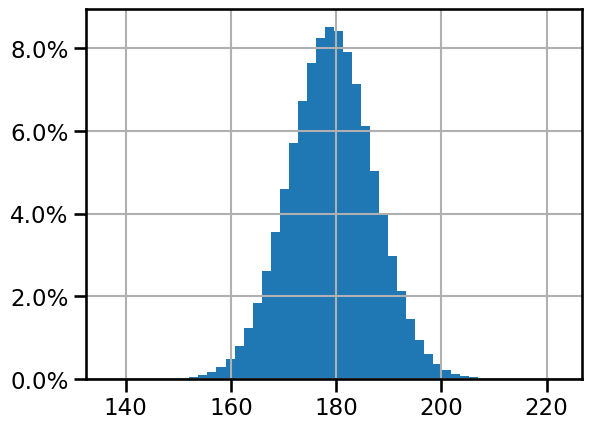

In [6]:
from matplotlib.ticker import PercentFormatter
plt.hist(x,bins=50, weights=np.ones(len(x)) / len(x))
plt.grid()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

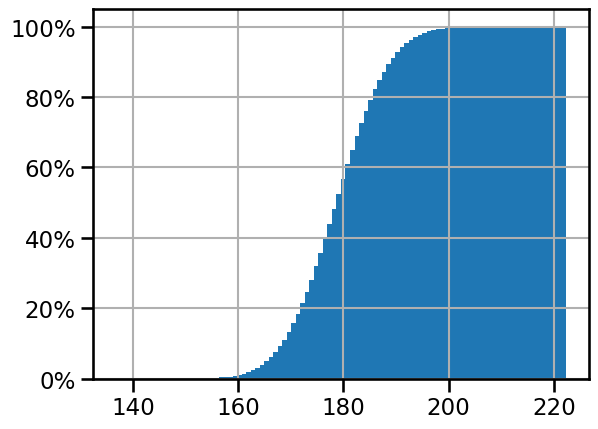

In [7]:
from matplotlib.ticker import PercentFormatter

plt.hist(x,bins=100, weights=np.ones(len(x)) / len(x),cumulative=1)
plt.grid()


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

179.00757425195704


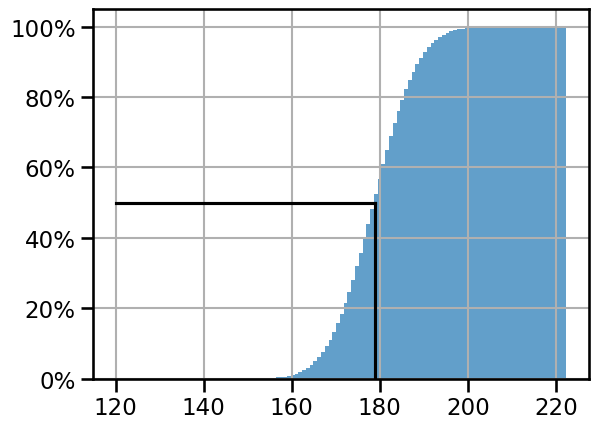

In [8]:
from matplotlib.ticker import PercentFormatter
plt.hist(x,bins=100, weights=np.ones(len(x)) / len(x),cumulative=1,alpha=0.7)
plt.grid()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.plot([120,np.median(x)],[50e-2,50e-2],'k');plt.plot([np.median(x),np.median(x)],[50e-2,0],'k')
print(np.median(x))

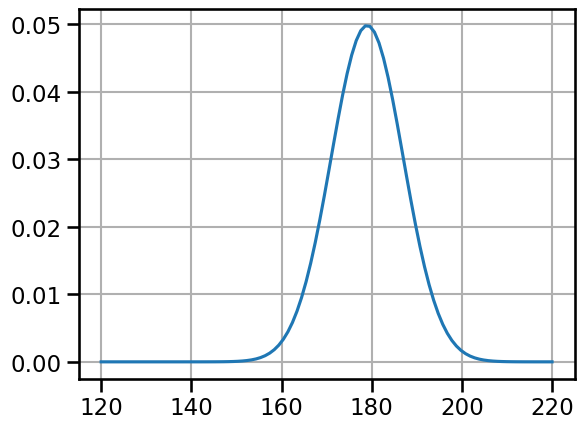

In [9]:
# loi normal
from scipy import stats
x = np.linspace(120,220,num=100)
y = stats.norm.pdf(x,179,8)
plt.plot(x,y);plt.grid()

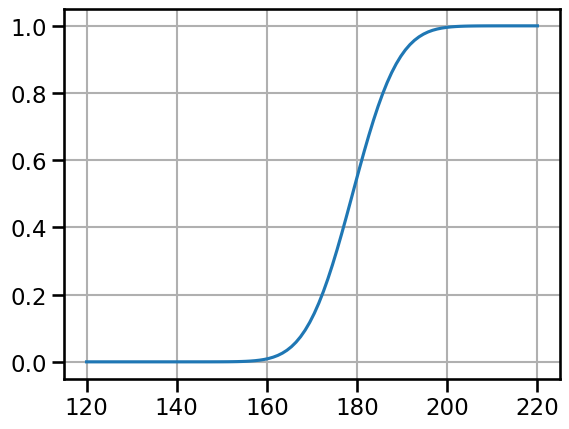

In [10]:
y = stats.norm.cdf(x,179,8);
plt.plot(x,y);plt.grid()

## Exemple 2D

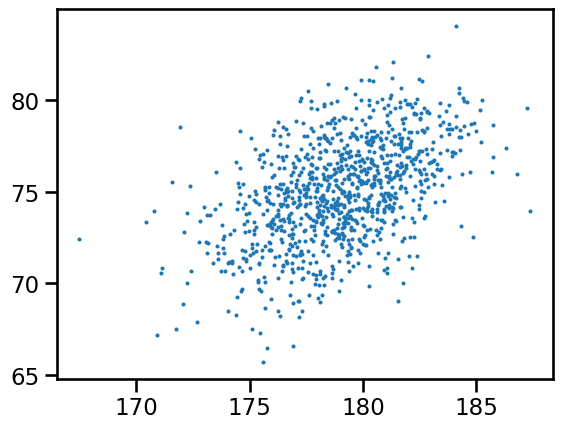

In [11]:
X = np.random.multivariate_normal(mean=[179,75],cov = [[8,4],[4,8]],size=1000)
plt.scatter(X[:,0],X[:,1],alpha=1,s=2)


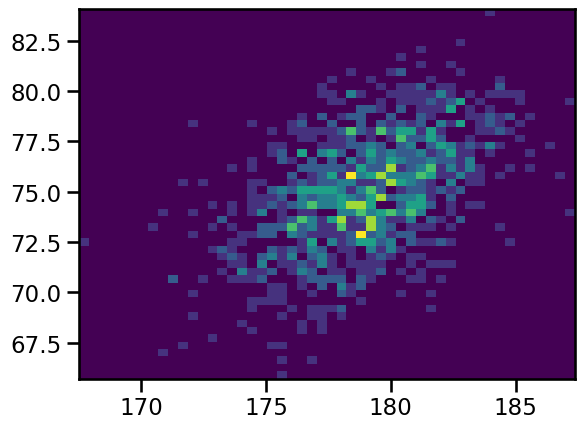

In [12]:
plt.hist2d(X[:,0],X[:,1],bins=50);

In [13]:
# Create grid and multivariate normal
x = np.linspace(160, 190, 200) # Create a mesh of 200 x-points
y = np.linspace(65, 85, 200) # Create a mesh of 200 y-points

X, Y = np.meshgrid(x,y)
pos = np.dstack((X, Y))
Z = stats.multivariate_normal.pdf(pos,[179,75],[[8,4],[4,8]])

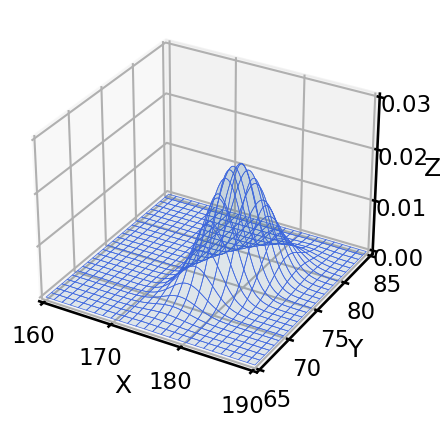

In [14]:
ax = plt.figure(figsize=[5,10]).add_subplot(projection='3d')
# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.1)
ax.set(ylim=(65, 85), xlim=(160, 190), zlim=(0, 0.03),
       xlabel='X', ylabel='Y', zlabel='Z');

# Variable Aléatoire
- Variable dont la valeur est déterminée après la réalisation d’un phénomène, expérience ou événement, aléatoire
- Notation en majuscule $X$, $Y$, $Z$ (souvent celles-là)
- Elle est associée à des probabilités $\mathbb  {P}_X$ d'évènements $A$, $B$, $C$, ... :  
 $\mathbb  {P}_X(A)$, $\mathbb  {P}_X(B)$, $\mathbb  {P}_X(C)$ (souvent $A$, $B$, $C$, ... ou $A_1$, $A_2$, $A_3$, ...)
- L'ensemble des évènements possible est $\Omega$
- $A,B,C \in \Omega$ 

# Exemples
- Discret : Jeux de hasard (cartes, dés, pile ou face)
- Continu : Prédiction continue (météo, ratings, effet d'un médicament, ventes, ...)

# Quelques principes de probabilité
- $0\leq \mathbb  {P}(A)\leq 1$
- $\mathbb  {P}(\Omega) = 1$

Évènements incompatibles :
- ${\mathbb  {P}}(A_{1}\cup A_{2}\cup \cdots )=\sum _{{i=1}}^{{+\infty }}{\mathbb  {P}}(A_{i})$

Évènements compatibles :
- ${\mathbb  {P}}(A_{1}\cup A_{2})={\mathbb  {P}}(A_{1}) + \mathbb  {P}(A_{2})- \mathbb  {P}(A_1\cap A_2)$

Évènements Indépendants :
- ${\mathbb  {P}}(A_{1}\cap A_{2})={\mathbb  {P}}(A_{1}) \times \mathbb  {P}(A_{2})$

## Loi des Grands Nombres
~ Les propriétés d'un échantillon tendent vers les propriétés de la distribution de probabilité qui la gouverne.

$\rightarrow$ Fait le pont entre les statistiques et les probabilités

# Lois de probabilité classiques
## Discrète uniforme : $\frac{\# cas\, favorables}{\# cas\, possibles}$
- $A_1$ : Tirer un valet de trèfle dans un paquet de 52 cartes
- $A_2$ : Obtenir un 6 au dé
- $A_3$ : Obtenir deux 6 sur deux lancers de dé
- $A_4$ : Obtenir au moins un 6 sur deux lancers de dé
- $A_5$ : Obtenir au moins un 6 sur six lancers de dé
- $A_6$ : Obtenir 4 fois "face" en quatre lancers de pièce
- $A_7$ : Obtenir "face" après avoir obtenu 3 fois "piles"
- $A_8$ : Obtenir exactement deux 6 sur cinq lancers de dé

# Lois de probabilité classiques
## Binomiale  
- modélise la fréquence du nombre de succès obtenus lors de la répétition de plusieurs expériences aléatoires identiques et indépendantes.
- $\frac{\# cas favorables}{\# cas possibles}$
- $p$ : chance de succès sur une expérience
- ${\displaystyle \mathbb {P} (X=k)={n \choose k}\,p^{k}(1-p)^{n-k}}$
- ${n \choose k}=C_{n}^{k}\,={\frac  {n!}{k!(n-k)!}}.$


- Aux dés, sur cinq lancers, le nombre de combinaisons dans lequelles il y a deux 6 est ${5 \choose 2}=C_{5}^{2}\,={\frac  {5!}{2!(5-2)!}}=10.$
    1. 6,6,x,x,x
    1. 6,x,6,x,x
    1. 6,x,x,6,x
    1. 6,x,x,x,6
    1. x,6,6,x,x
    1. x,6,x,6,x
    1. x,6,x,x,6
    1. x,x,6,6,x
    1. x,x,6,x,6
    1. x,x,6,x,6


In [15]:
import math
math.comb(5,2)

10

## Binomiale
Quelle est la probabilité d'obtenir deux 6 sur 5 lancés de dé?

- ${n \choose k}\,p^{k}(1-p)^{n-k} = 10\times(\frac{1}{6})^2\times (\frac{5}{6})^3 = 0.16075$

## Loi binomiale : Expériences

In [16]:
np.random.seed(2)

In [17]:
N = 10
x = np.random.randint(1,7,[N,5])
print(x)
print(sum(np.sum(x == 6,axis=1)==2)/N)

[[1 6 1 4 3]
 [4 1 3 2 4]
 [6 3 5 5 5]
 [6 4 5 3 4]
 [4 3 2 3 5]
 [4 6 1 5 4]
 [2 3 1 5 5]
 [3 5 3 2 1]
 [3 6 3 2 6]
 [1 2 1 3 6]]
0.1


## Loi binomiale : Expériences

In [18]:
N = 1000000
x = np.random.randint(1,7,[N,5])
print(x)
print(sum(np.sum(x == 6,axis=1)==2)/N)

[[2 2 2 5 3]
 [4 1 4 1 3]
 [3 1 5 3 1]
 ...
 [6 4 5 5 4]
 [5 4 1 5 6]
 [5 5 4 2 1]]
0.160558


## Loi binomiale vs Expériences
### Nombre de 6 sur 20 lancés

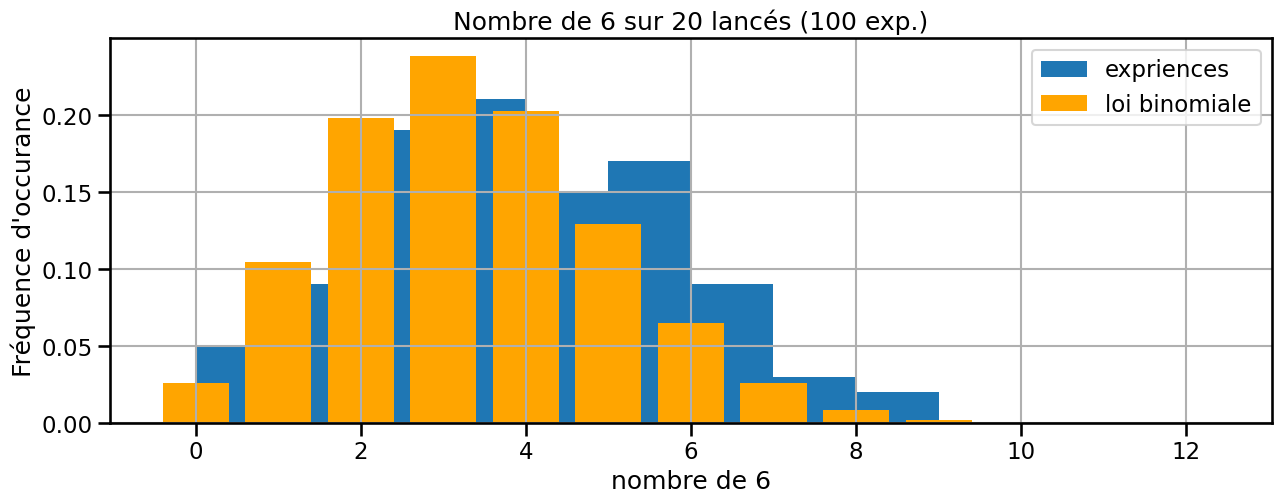

In [19]:
N = 100
x = np.random.randint(1,7,[N,20])

plt.figure(figsize=[15,5])
plt.hist(np.sum(x == 6,axis=1),weights=np.ones(N)/N,bins=np.linspace(0,12,13),label='expriences');
n = np.array(range(13))
plt.bar(n,[math.comb(20,n_i)*(1/6)**n_i*(5/6)**(20-n_i) for n_i in n],color='orange',label='loi binomiale')
plt.grid()
plt.title('Nombre de 6 sur 20 lancés ({} exp.)'.format(N))
plt.xlabel("nombre de 6")
plt.ylabel("Fréquence d'occurance")
plt.legend();


## Loi binomiale vs Expériences
### Nombre de 6 sur 20 lancés

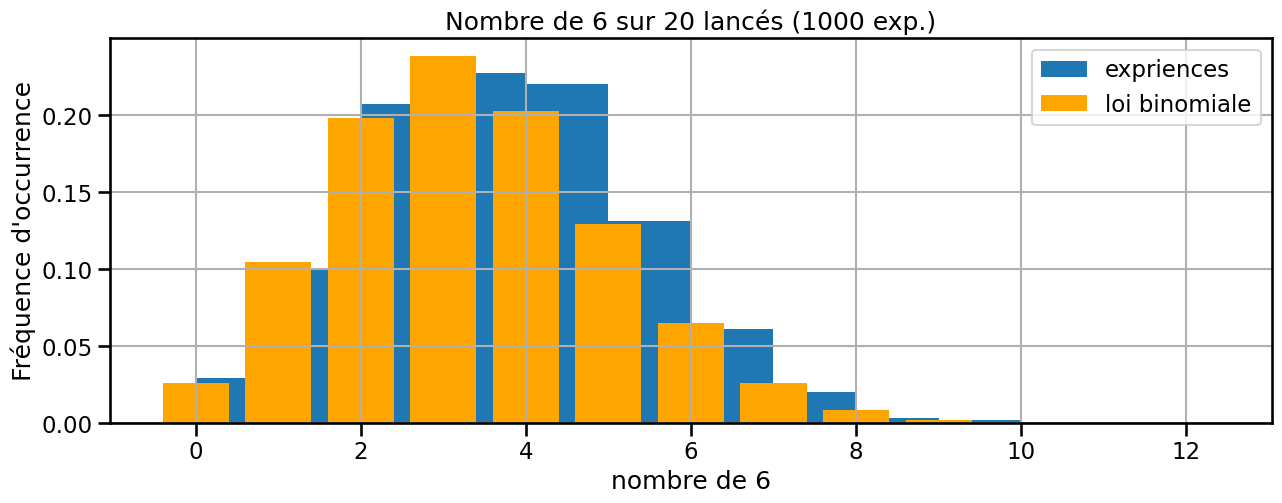

In [20]:
N = 1000
x = np.random.randint(1,7,[N,20])
plt.figure(figsize=[15,5])
plt.hist(np.sum(x == 6,axis=1),weights=np.ones(N)/N,bins=np.linspace(0,12,13),label='expriences');
n = np.array(range(13))
plt.bar(n,[math.comb(20,n_i)*(1/6)**n_i*(5/6)**(20-n_i) for n_i in n],color='orange',label='loi binomiale')
plt.grid()
plt.title('Nombre de 6 sur 20 lancés ({} exp.)'.format(N))
plt.xlabel("nombre de 6")
plt.ylabel("Fréquence d'occurrence")
plt.legend();

## Pile ou face sur 100 lancés

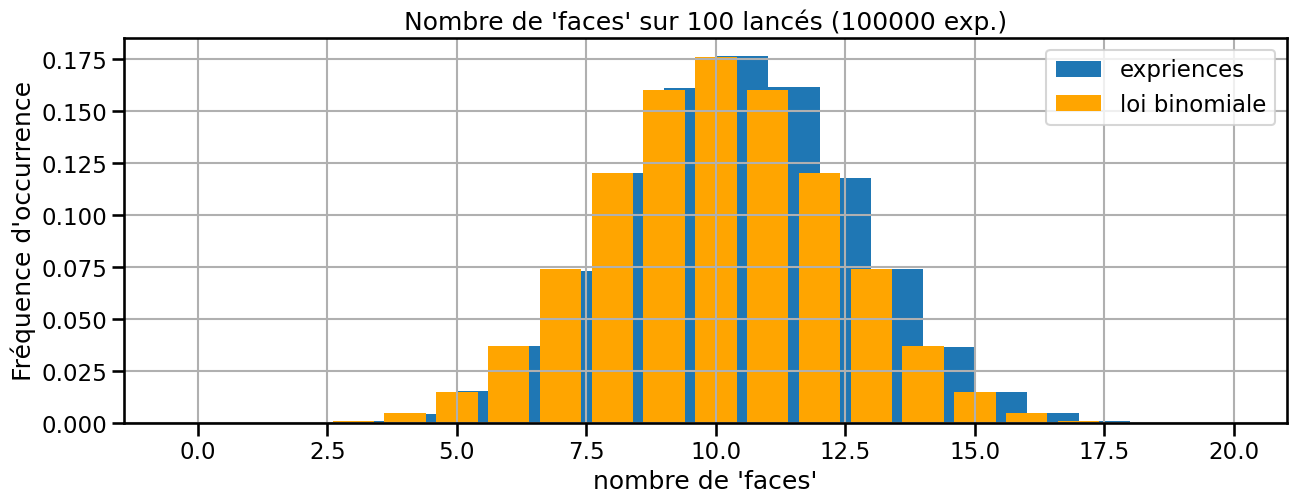

In [21]:
N = 100000
x = np.random.randint(1,3,[N,20])
plt.figure(figsize=[15,5])
plt.hist(np.sum(x == 1,axis=1),weights=np.ones(N)/N,bins=np.linspace(0,20,21),label='expriences');
n = np.array(range(20))
plt.bar(n,[math.comb(20,n_i)*(0.5)**n_i*(0.5)**(20-n_i) for n_i in n],color='orange',label='loi binomiale')
plt.grid()
plt.title("Nombre de 'faces' sur 100 lancés ({} exp.)".format(N))
plt.xlabel("nombre de 'faces'")
plt.ylabel("Fréquence d'occurrence")
plt.legend();

# Lois de probabilité classiques
## Continues
- Fonction de densité de probabilité : $f(x)$
- Exemples
    - Uniforme
    - Normale

## Illustration
Le poids d'une pomme de terre
1. Uniforme de 120g à 240g
2. Normale : 180g (moyenne) +- 25g (écart-type)

## Loi uniforme 
### Fonction de probabilité et d'échantillonnage

In [22]:
np.random.seed(12)
b1 = 120
b2 = 240

def f(x,b1,b2):
    if (type(x)==int) or (type(x)==float) :
        if ((x>b1) and (x<b2)):
            return 1/(b2-b1) 
        else:
            return 0
    else:
        p = np.zeros(len(x)) 
        p[(x>b1) & (x<b2)]=1/(b2-b1)
        return p
        
def weight_n_potatoes(N,b1,b2):
    return b1+np.random.rand(N)*(b2-b1)

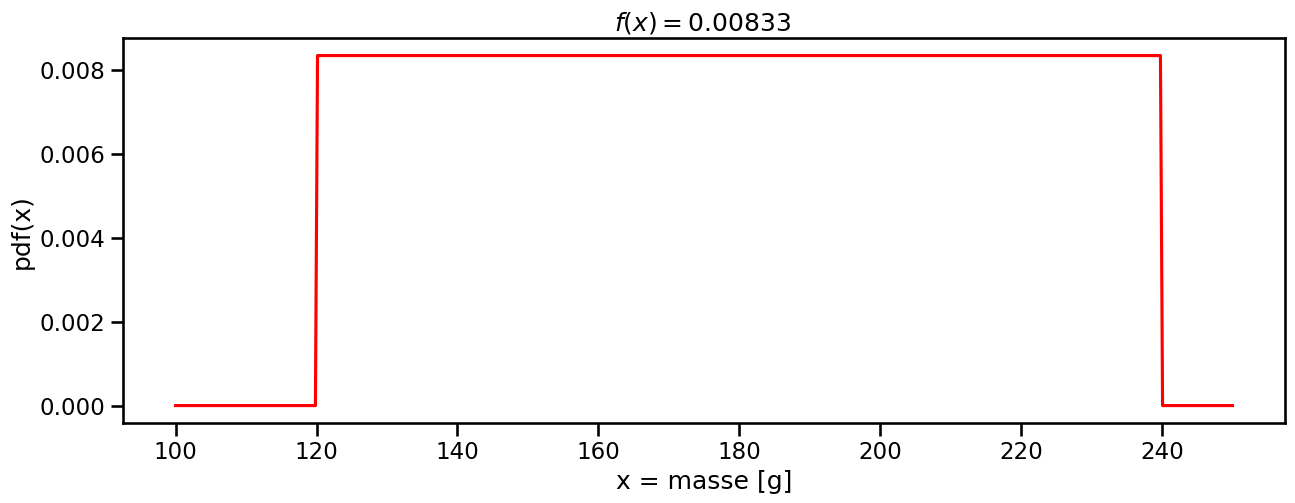

In [23]:
plt.figure(figsize=[15,5])
x1 = np.linspace(100,250,500)
plt.plot(x1,f(x1,b1,b2),c='red')
plt.xlabel("x = masse [g]")
plt.ylabel("pdf(x)")
plt.title(r'$f(x) = {:0.5f}$ '.format(1/(b2-b1)));

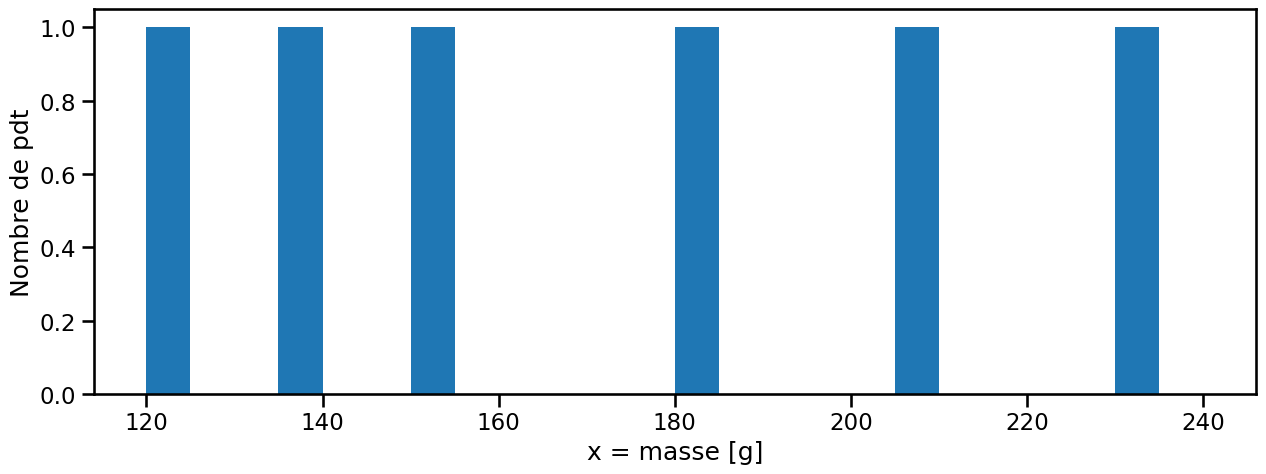

In [24]:
plt.figure(figsize=[15,5])
N = 6
x = weight_n_potatoes(N,b1,b2)
bins=np.linspace(120,240,25)
plt.xlabel("x = masse [g]")
plt.ylabel("Nombre de pdt")
plt.hist(x,bins);

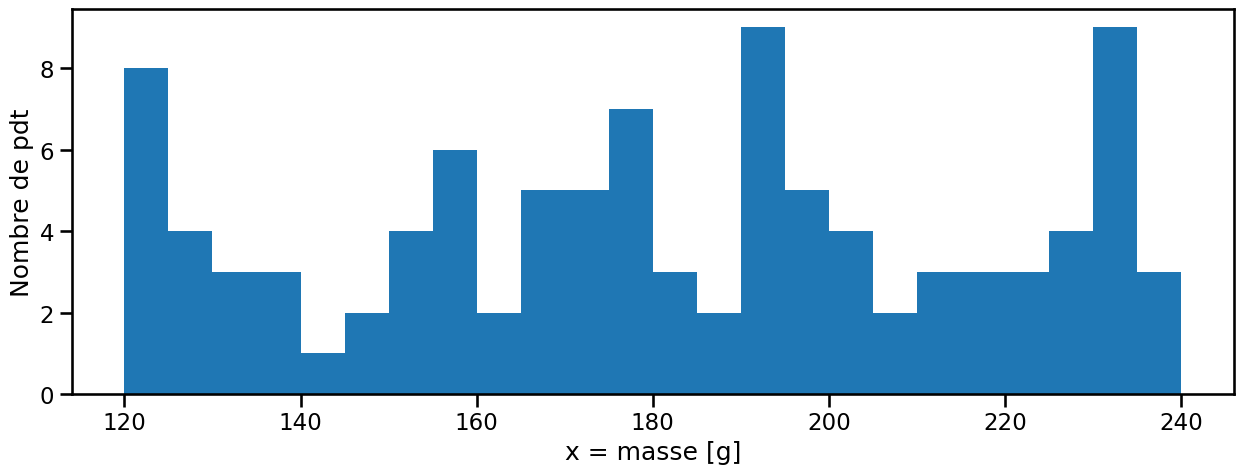

In [25]:
plt.figure(figsize=[15,5])
N = 100
x = weight_n_potatoes(N,b1,b2)
bins=np.linspace(120,240,25)
plt.xlabel("x = masse [g]")
plt.ylabel("Nombre de pdt")
plt.hist(x,bins);

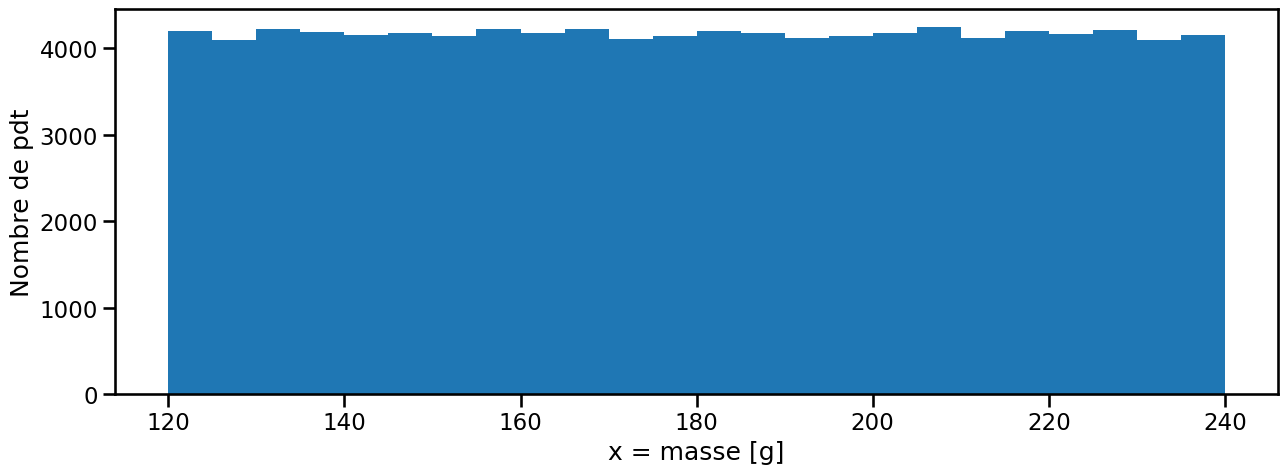

In [26]:
plt.figure(figsize=[15,5])
N = 100000
x = weight_n_potatoes(N,b1,b2)
bins=np.linspace(120,240,25)
plt.xlabel("x = masse [g]")
plt.ylabel("Nombre de pdt")
plt.hist(x,bins);

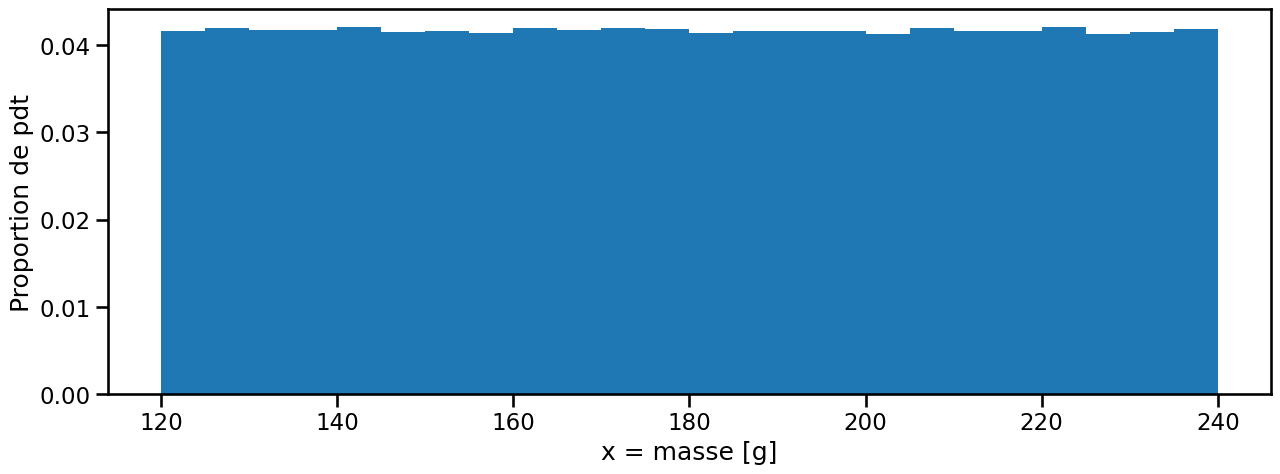

In [27]:
plt.figure(figsize=[15,5])
N = 1000000
x = weight_n_potatoes(N,b1,b2)
bins=np.linspace(120,240,25)
plt.xlabel("x = masse [g]")
plt.ylabel("Proportion de pdt")
plt.hist(x,bins,weights=np.ones(N)/N); 

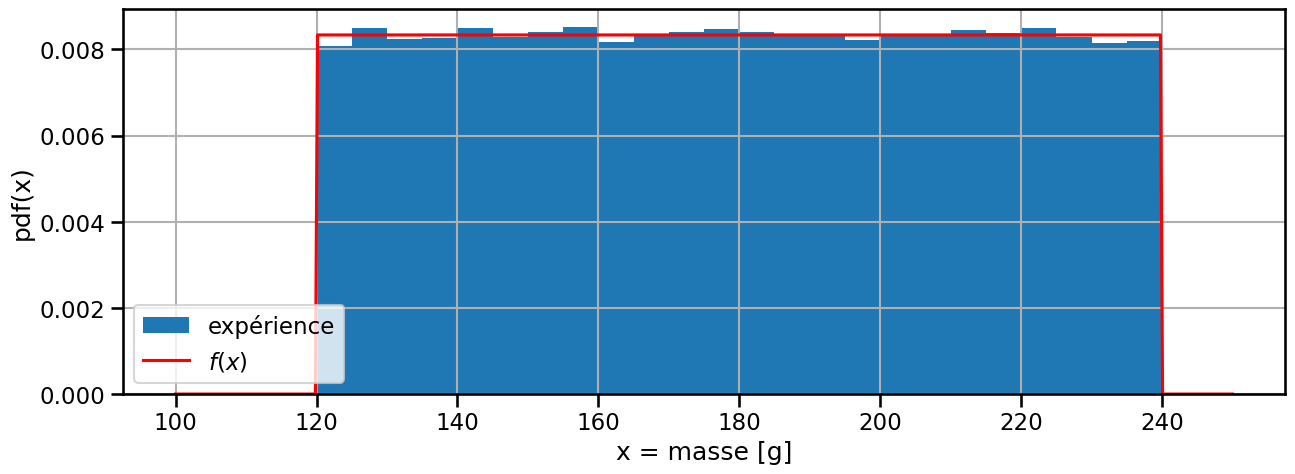

In [28]:
plt.figure(figsize=[15,5])
N = 100000
x = weight_n_potatoes(N,b1,b2)
bins=np.linspace(120,240,25)
plt.xlabel("x = masse [g]")
plt.ylabel("Densité de pdt")
plt.hist(x,bins,weights=np.ones(N)/N/120*24,label=r'expérience'); # 120 grammes - 24 bins
x1 = np.linspace(100,250,500)
plt.plot(x1,f(x1,b1,b2),c='red',label=r'$f(x)$')
plt.xlabel("x = masse [g]")
plt.ylabel("pdf(x)");
plt.legend()
plt.grid()

## Exercice
- Quel est la probabilité de trouver une pdt de 182.3 g? 

0.008333333333333333


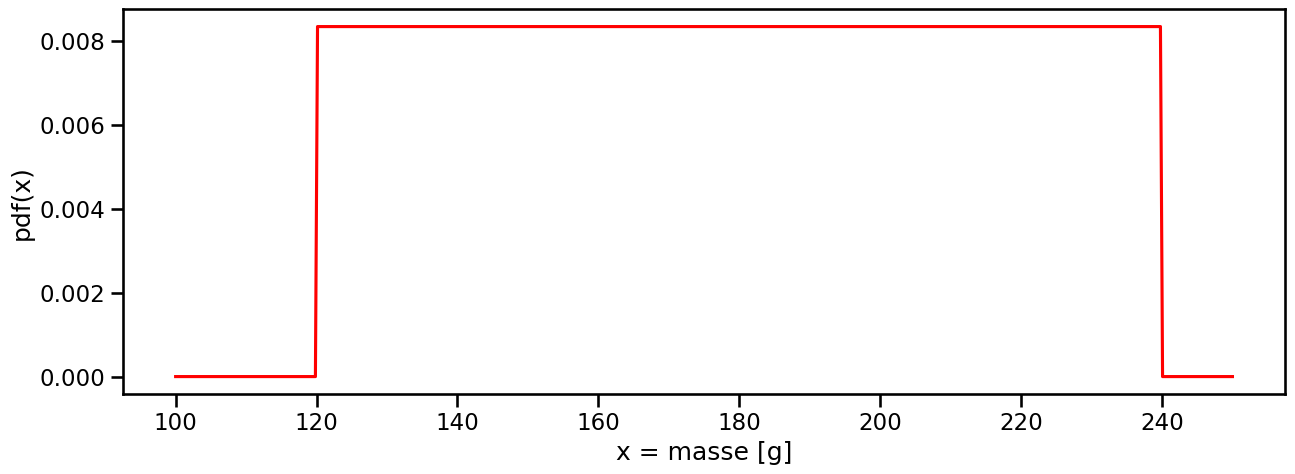

In [29]:
plt.figure(figsize=[15,5])
x1 = np.linspace(100,250,500)
plt.plot(x1,f(x1,b1,b2),c='red')
plt.xlabel("x = masse [g]")
plt.ylabel("pdf(x)");
print(f(182.3,b1,b2))

## Interprétation
Il s'agit d'une densité de probabilité. Elle est exprimée "par unité". 

$ f(x) = 0.008333 \neq \mathbb  {P}(X=x) $


## Exercice
- Quelle est la probabilité de trouver une pdt pesant 182 -/+ 0.5 g?
- Quelle est la probabilité de trouver une pdt pesant entre 175 et 200g?

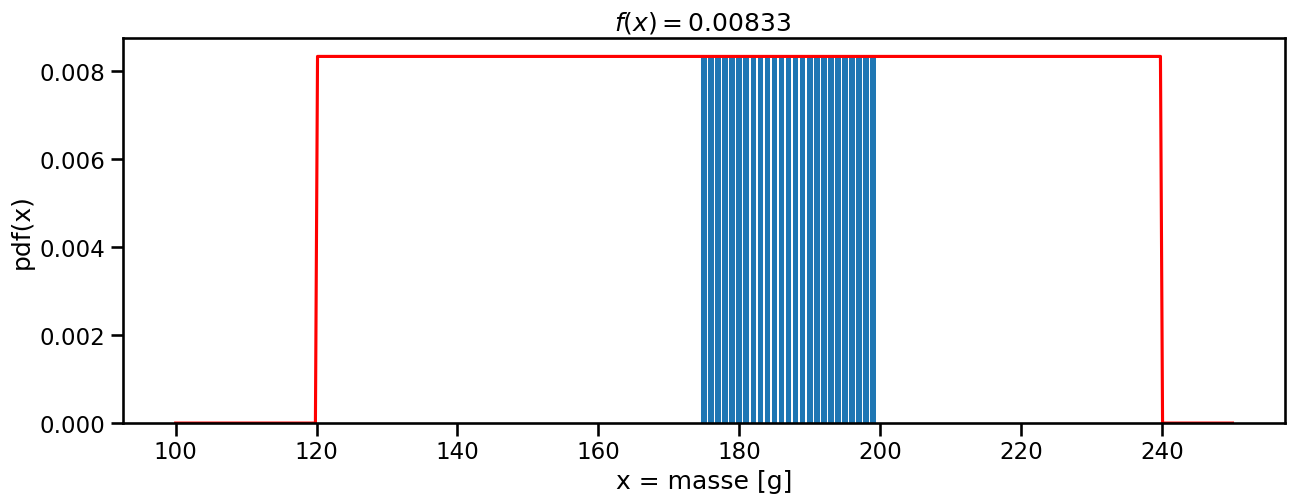

In [30]:
plt.figure(figsize=[15,5])
x1 = np.linspace(100,250,500)
plt.plot(x1,f(x1,b1,b2),c='red')
plt.xlabel("x = masse [g]")
plt.ylabel("pdf(x)")
plt.bar(np.array(range(175,200)),1/(b2-b1))
plt.title(r'$f(x) = {:0.5f}$ '.format(1/(b2-b1)));

Somme des surfaces de chaque bar : hauteur x largeur
$(200-175) \times 0.0083333 = 0.208$ 

## Fonction de répartition

### Densité de probabilité
= pdf en anglais
$$
f(x) = \left\{
    \begin{array}{ll}
        0.0083333 & \mbox{si } 120 \leq x \leq 240\\
        0 & \mbox{sinon.}
    \end{array}
\right.
$$

### Fonction de répartition 
= Densité de proababilité cumulée 
= cdf en anglais
$$F(x) = \int_{-\infty}^{x} f(t)dt $$

$$\int_{175}^{200} f(t)dt = F(200)-F(175) = 0.20833$$

In [31]:
def cdf(x,b1,b2):
    if (type(x)==int) or (type(x)==np.int64) or (type(x)==np.int32):
        if ((x>b1) and (x<b2)):
            return 1/(b2-b1)*(x-b1) 
        else:
            return 0
    else:
        x = np.array(x)
        p = np.zeros(len(x)) 
        zone_prop = (x>b1) & (x<=b2) 
        zone_1 = x>b2
        p[zone_prop] = 1/(b2-b1)*(x[zone_prop]-b1) 
        p[zone_1] = np.ones(sum(zone_1))
        return p

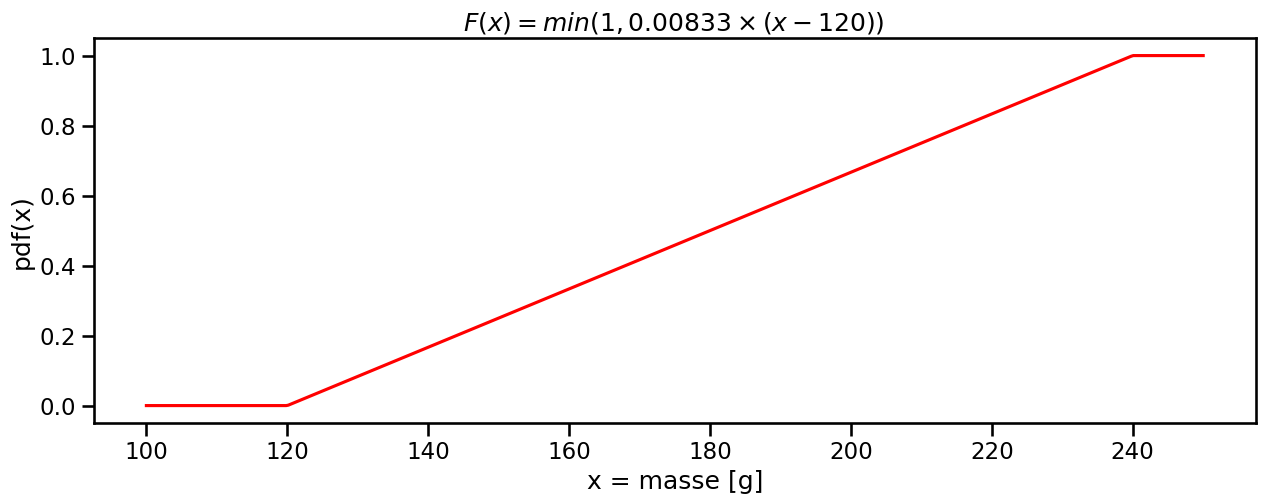

In [32]:
plt.figure(figsize=[15,5])
x1 = np.linspace(100,250,500)
plt.plot(x1,cdf(x1,b1,b2),c='red')
plt.xlabel("x = masse [g]")
plt.ylabel("pdf(x)")
plt.title(r'$F(x) = min(1,{:0.5f}\times (x-{}) )$ '.format(1/(b2-b1),b1));

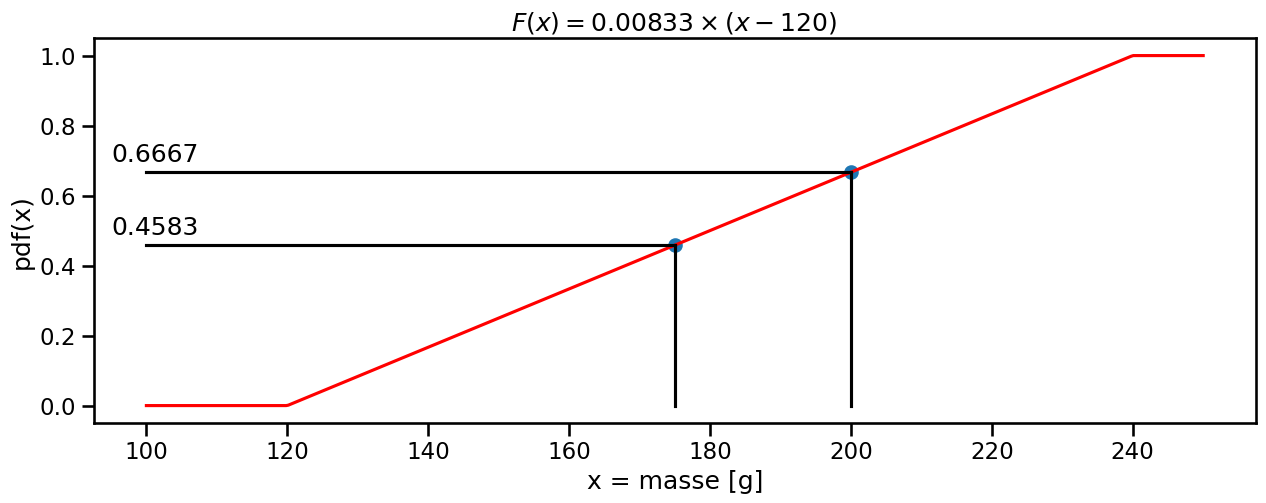

In [33]:
plt.figure(figsize=[15,5])
x1 = np.linspace(100,250,500)
plt.plot(x1,cdf(x1,b1,b2),c='red')
plt.xlabel("x = masse [g]")
plt.ylabel("pdf(x)")
plt.title(r'$F(x) = {:0.5f}\times (x-{}) $ '.format(1/(b2-b1),b1));
bounds = np.array([175,200])
cdfs = cdf(bounds,b1,b2)
plt.scatter(bounds,cdfs);
plt.plot([100,bounds[0]],[cdfs[0],cdfs[0]],'k')
plt.plot([100,bounds[1]],[cdfs[1],cdfs[1]],'k')
plt.plot([bounds[0],bounds[0]],[0,cdfs[0]],'k')
plt.plot([bounds[1],bounds[1]],[0,cdfs[1]],'k')
plt.text(95,cdfs[0]+0.03,'{:.4f}'.format(cdfs[0]));
plt.text(95,cdfs[1]+0.03,'{:.4f}'.format(cdfs[1]));

In [34]:
print("cdf(200) - cdf(175) = ")
print("{:.5f} - {:.5f} = {:.5f}".format(cdf(bounds[1],b1,b2), cdf(bounds[0],b1,b2),cdf(bounds[1],b1,b2)-cdf(bounds[0],b1,b2)))

cdf(200) - cdf(175) = 
0.66667 - 0.45833 = 0.20833


## Loi Normale 
### Fonction de probabilité et d'échantillonnage


In [35]:
np.random.seed(1)
m = 180
s = 20

def f(x,m=0,s=1):
    t = (x-m)/s
    return 1/(s*np.sqrt(2*np.pi))*np.exp(-0.5*(t**2))

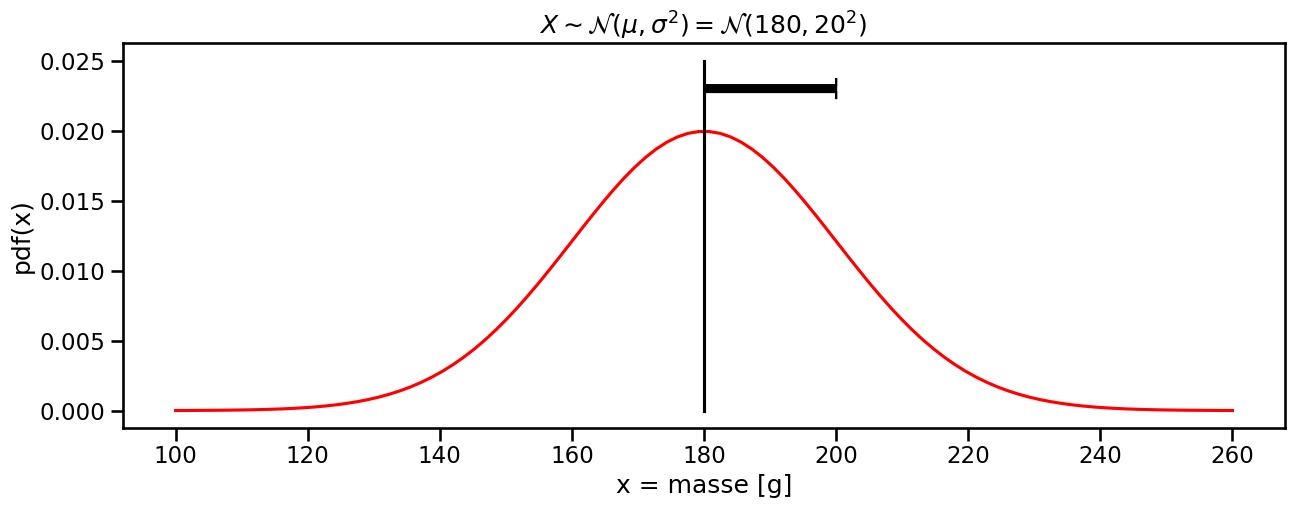

In [36]:
plt.figure(figsize=[15,5])
x1 = np.linspace(m-4*s,m+4*s,100)
plt.plot(x1,f(x1,m,s),c='red')
plt.xlabel("x = masse [g]")
plt.ylabel("pdf(x)")
plt.plot([m,m],[0,0.025],'k')
plt.arrow(m,0.023,s,0,color='k',length_includes_head=True,shape='full',width=0.0005);
plt.title(r'$X\sim {\mathcal {N}}(\mu ,\sigma ^{2}) = {\mathcal {N}}(180 ,20 ^{2})$ ');

## Loi Normale 
### Fonction de probabilité et d'échantillonnage
$f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\operatorname {e} ^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$ 

$f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\operatorname {e} ^{-{\frac {1}{2}}{t}^{2}}$ avec $t = \frac{x-\mu}{\sigma}$

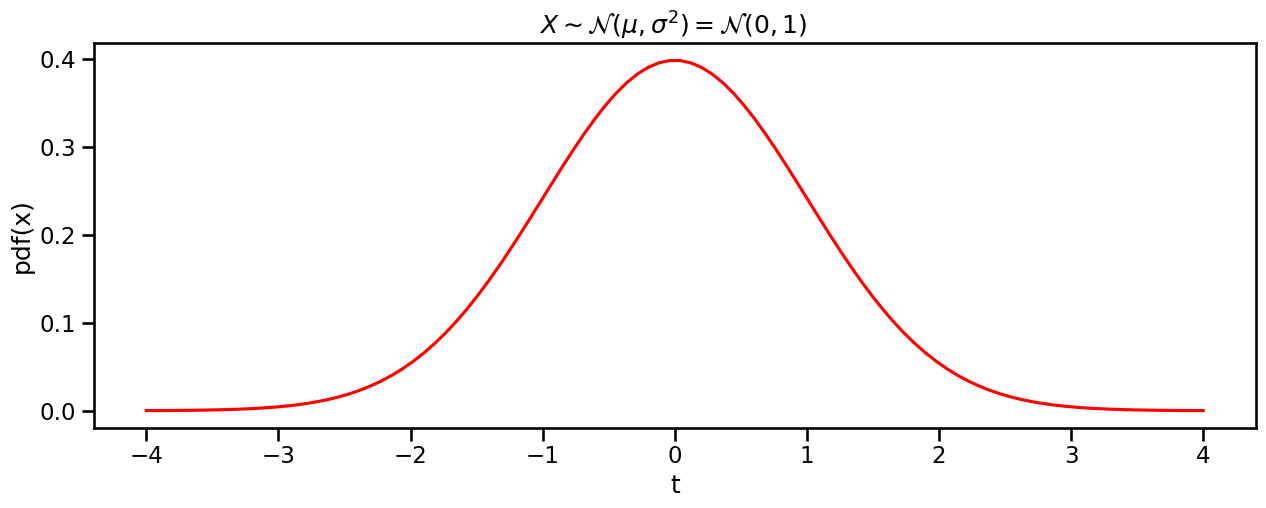

In [37]:
plt.figure(figsize=[15,5])
x1 = np.linspace(-4,4,100)
plt.plot(x1,f(x1),c='red')
plt.xlabel("t")
plt.ylabel("pdf(x)")
plt.title(r'$X\sim {\mathcal {N}}(\mu ,\sigma ^{2}) = {\mathcal {N}}(0 ,1)$ ');

## Loi Normale 
- Distribution la plus répendue
- Elle correspond à un grand nombre de phénomènes
- Théorème central limite
    - Intuitivement, il affirme qu'une somme de variables aléatoires indépendantes et identiquement distribuées tend (le plus souvent) vers une variable aléatoire gaussienne.
  



### Théorème central limite : Planche de Galton
![alt text](galton.png "figure")

## Expérience

In [38]:
def f(x,m=0,s=1):
    t = (x-m)/s
    return 1/(s*np.sqrt(2*np.pi))*np.exp(-0.5*(t**2))

def weight_n_potatoes(N,m,s):
    return np.random.randn(N)*s+m

### Échantillonnage

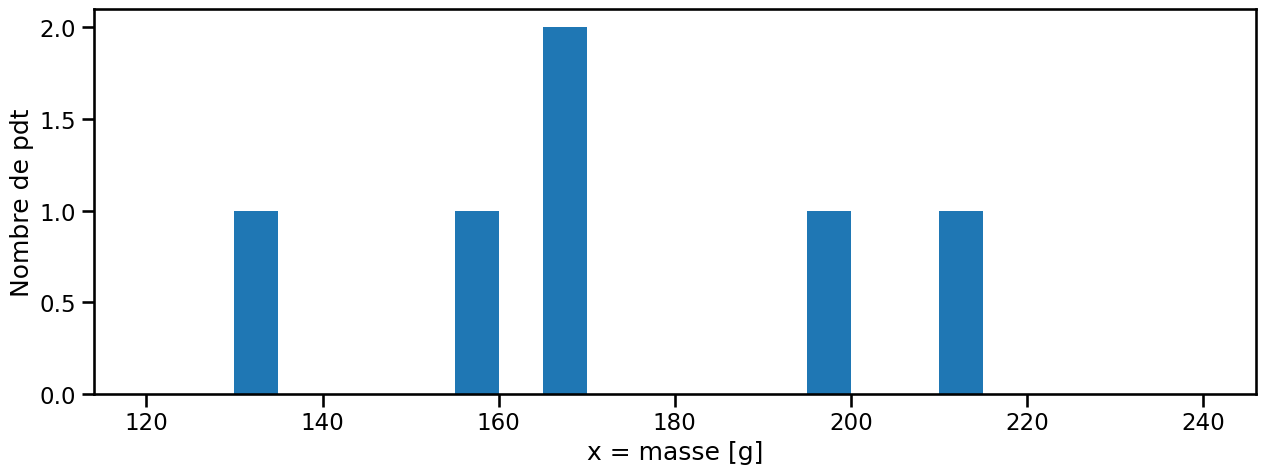

In [39]:
plt.figure(figsize=[15,5])
N = 6
x = weight_n_potatoes(N,m,s)
bins=np.linspace(120,240,25)
plt.xlabel("x = masse [g]")
plt.ylabel("Nombre de pdt")
plt.hist(x,bins);

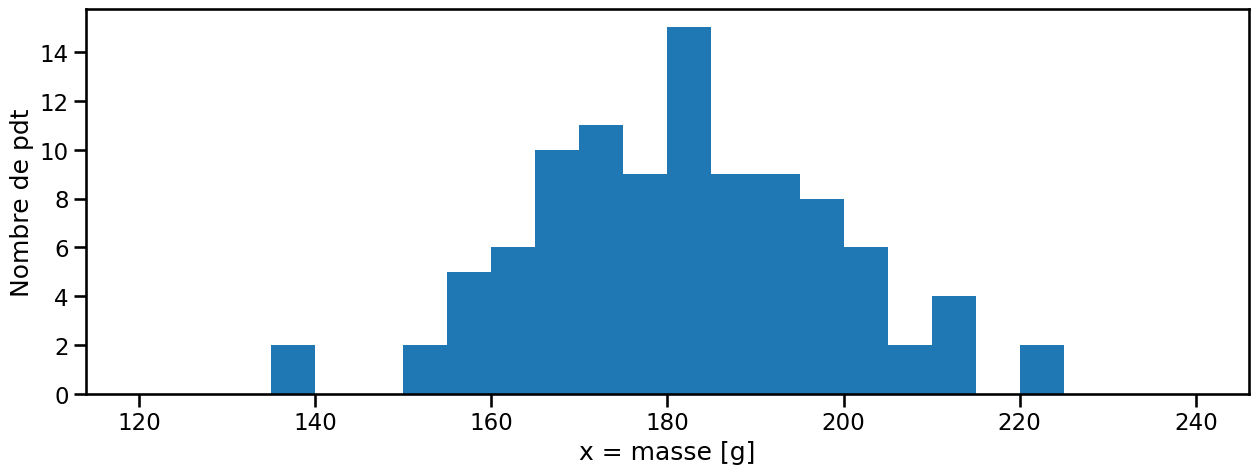

In [40]:
plt.figure(figsize=[15,5])
N = 100
x = weight_n_potatoes(N,m,s)
bins=np.linspace(120,240,25)
plt.xlabel("x = masse [g]")
plt.ylabel("Nombre de pdt")
plt.hist(x,bins);

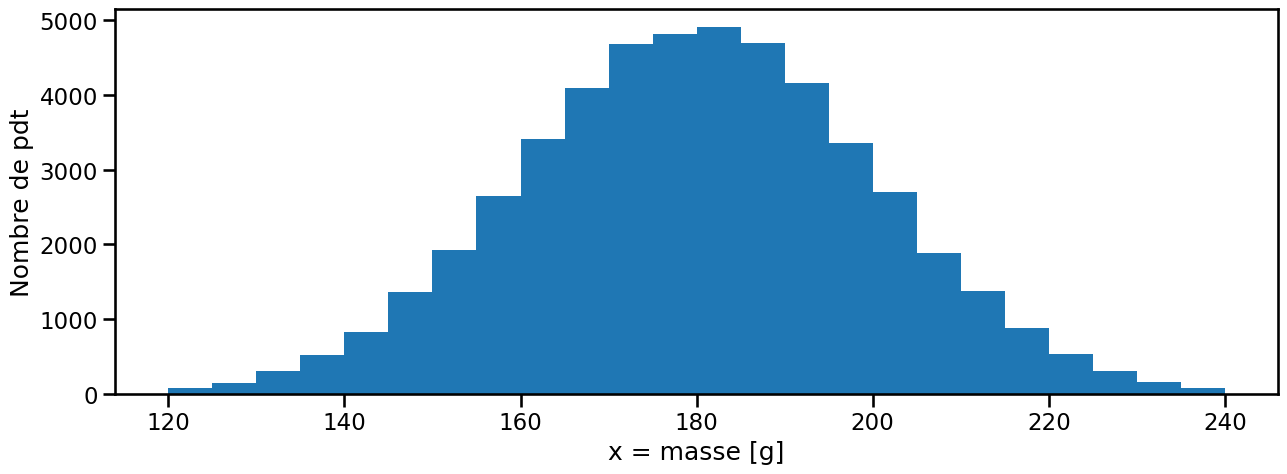

In [41]:
plt.figure(figsize=[15,5])
N = 50000
x = weight_n_potatoes(N,m,s)
bins=np.linspace(120,240,25)
plt.xlabel("x = masse [g]")
plt.ylabel("Nombre de pdt")
plt.hist(x,bins);

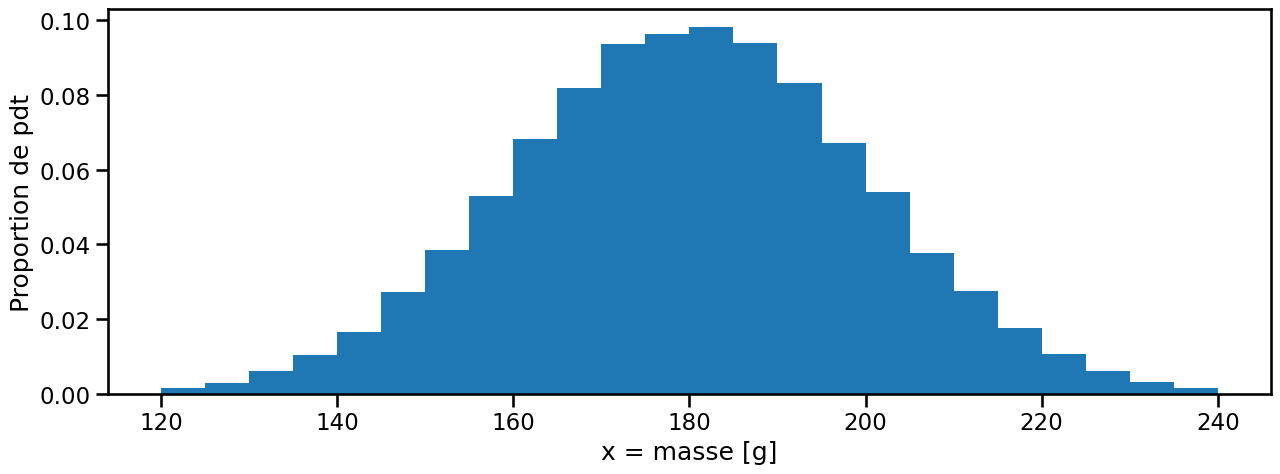

In [42]:
plt.figure(figsize=[15,5])
bins=np.linspace(120,240,25)
plt.ylabel("Proportion de pdt")
plt.hist(x,bins,weights=np.ones(N)/N)
plt.xlabel("x = masse [g]");



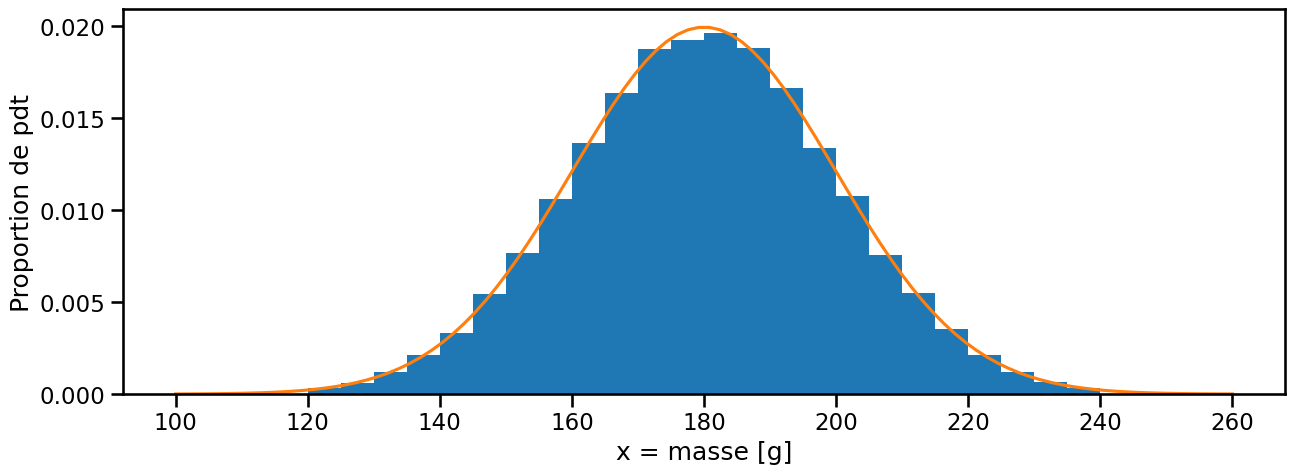

In [43]:
plt.figure(figsize=[15,5])

bins=np.linspace(120,240,25)
plt.ylabel("Proportion de pdt")
plt.hist(x,bins,weights=np.ones(N)/N/(bins[1]-bins[0]));
x1 = np.linspace(m-4*s,m+4*s,100)
plt.plot(x1,f(x1,m,s));
plt.xlabel("x = masse [g]");

## Exercice

- Quelle est la probabilité de récolter une pdt qui pèse 182 g?

f(182) = 0.019847627373850592


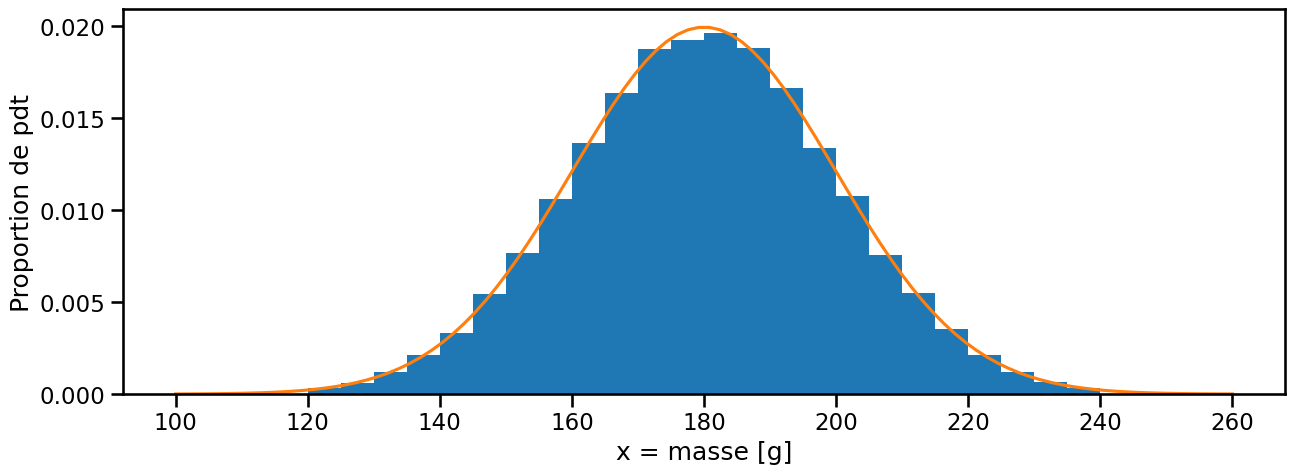

In [44]:
plt.figure(figsize=[15,5])
bins=np.linspace(120,240,25)
plt.ylabel("Proportion de pdt")
plt.hist(x,bins,weights=np.ones(N)/N/(bins[1]-bins[0]));
x1 = np.linspace(m-4*s,m+4*s,100)
plt.plot(x1,f(x1,m,s)); plt.xlabel("x = masse [g]");

print('f(182) = {}'.format(f(182,m,s),180,20))

## Exercice

- Quelle est la probabilité de récolter une pdt qui pèse entre 175 et 200 g?

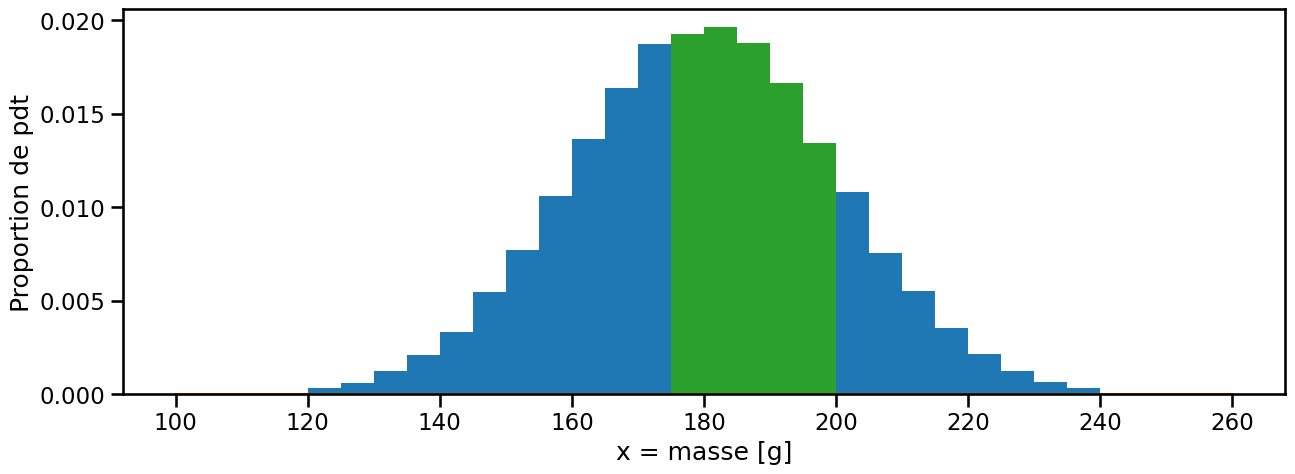

Aire verte = 0.4384400000004384


In [45]:
plt.figure(figsize=[15,5])
bins=np.linspace(120,240,25)
plt.ylabel("Proportion de pdt")
plt.hist(x,bins,weights=np.ones(N)/N/(bins[1]-bins[0]));
x1 = np.linspace(m-4*s,m+4*s,100)
plt.plot(x1,f(x1));
plt.xlabel("x = masse [g]");
bins=np.linspace(175,200,6)
a = plt.hist(x,bins,weights=np.ones(N)/N/(bins[1]-bins[0]))
plt.show()

print('Aire verte = {}'.format(sum(a[0]*5)))

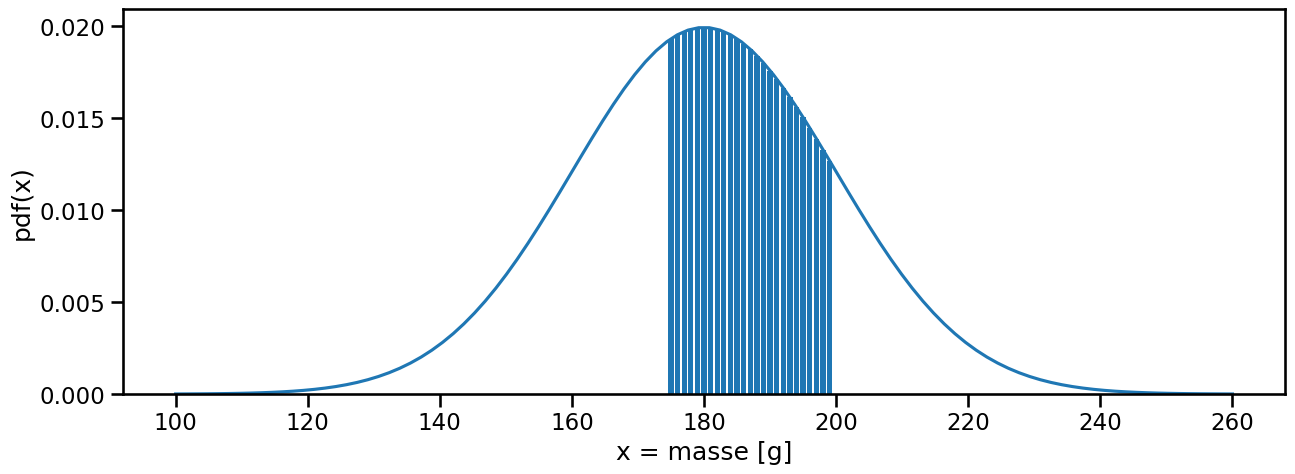

Aire = 0.44359795035925975


In [46]:
plt.figure(figsize=[15,5])

x1 = np.linspace(m-4*s,m+4*s,100)
plt.plot(x1,f(x1,180,20));
plt.xlabel("x = masse [g]");
plt.ylabel('pdf(x)')
bins=np.linspace(175,200,6)
x2 = np.array(range(175,200))
plt.bar(x2,f(x2,m,s))
plt.show()

print('Aire = {}'.format(sum(f(x2,m,s))))

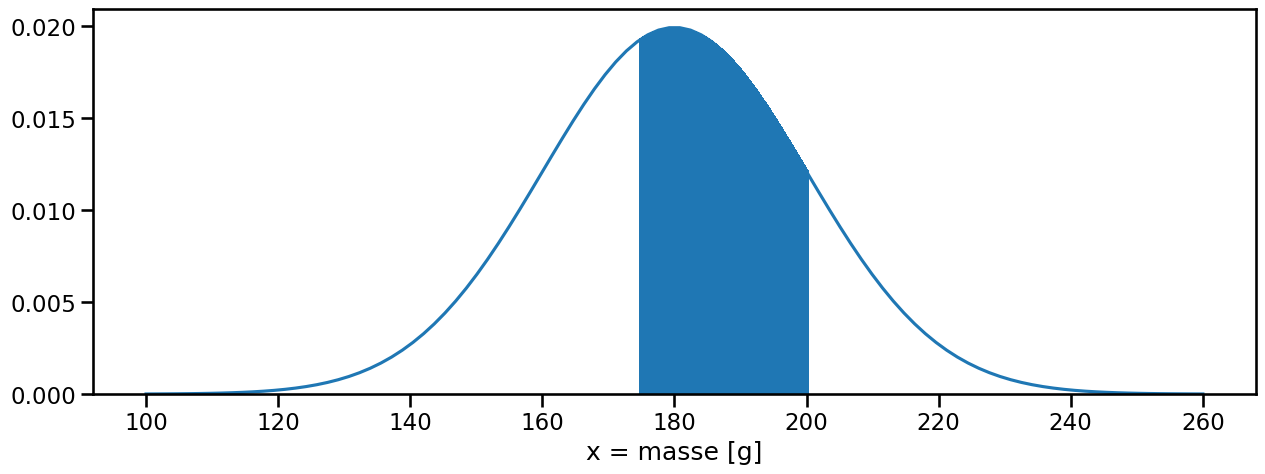

Aire = 0.4400322039753208


In [47]:
plt.figure(figsize=[15,5])

x1 = np.linspace(m-4*s,m+4*s,100)
plt.plot(x1,f(x1,180,20));
plt.xlabel("x = masse [g]");
bins=np.linspace(175,200,6)
x2 = np.linspace(175,200,25*100)
plt.bar(x2,f(x2,m,s))
plt.show()

print('Aire = {}'.format(sum(f(x2,m,s))/100))

## Fonction de répartition

$$f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\operatorname {e} ^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$$

$$t = \frac{x-\mu}{\sigma}$$

$$f(x)={\frac {1}{ {\sqrt {2\pi }}}}\operatorname {e} ^{-{\frac {1}{2}}{t}^{2}}$$

$$F(x) = \int_{-\infty}^{x} f(x)dx $$

In [48]:
def figure1():
    plt.figure(figsize=[15,5])

    x1 = np.linspace(m-4*s,m+4*s,100)
    plt.plot(x1,f(x1,180,20));
    plt.xlabel("x = masse [g]");
    bins=np.linspace(175,200,6)
    x2 = np.linspace(175,200,50)
    plt.bar(x2,f(x2,m,s))

    plt.ylabel('pdf(x)')

    import scipy.stats as st
    plt.figure(figsize=[15,5])
    x1 = np.linspace(m-4*s,m+4*s,200)

    plt.plot(x1,st.norm.cdf((x1-m)/s));
    plt.xlabel('Weight [g]')
    plt.ylabel('cdf(x)\n ')
    bounds = np.array([175,200])
    cdf = st.norm.cdf((bounds-m)/s)

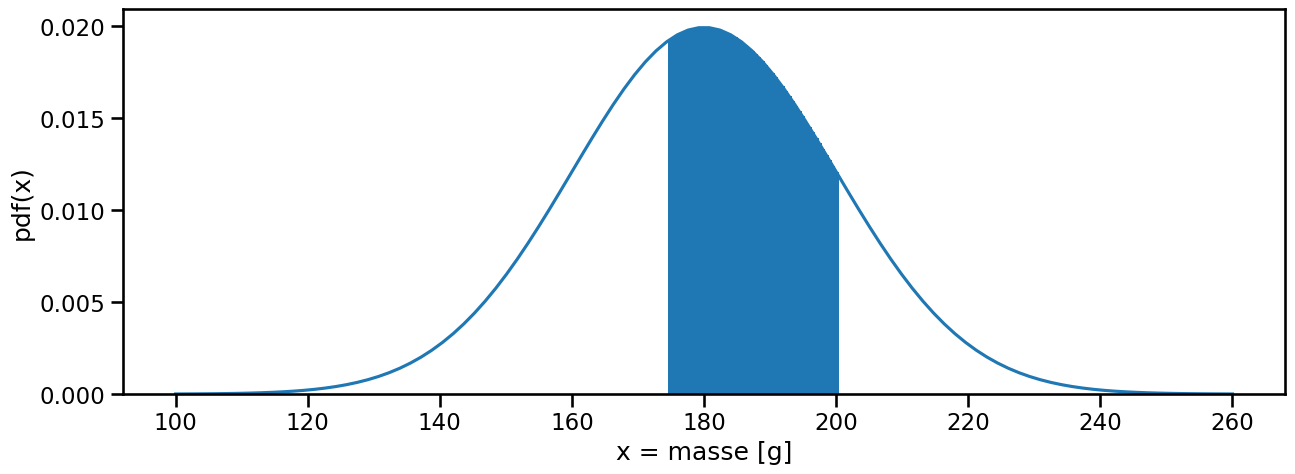

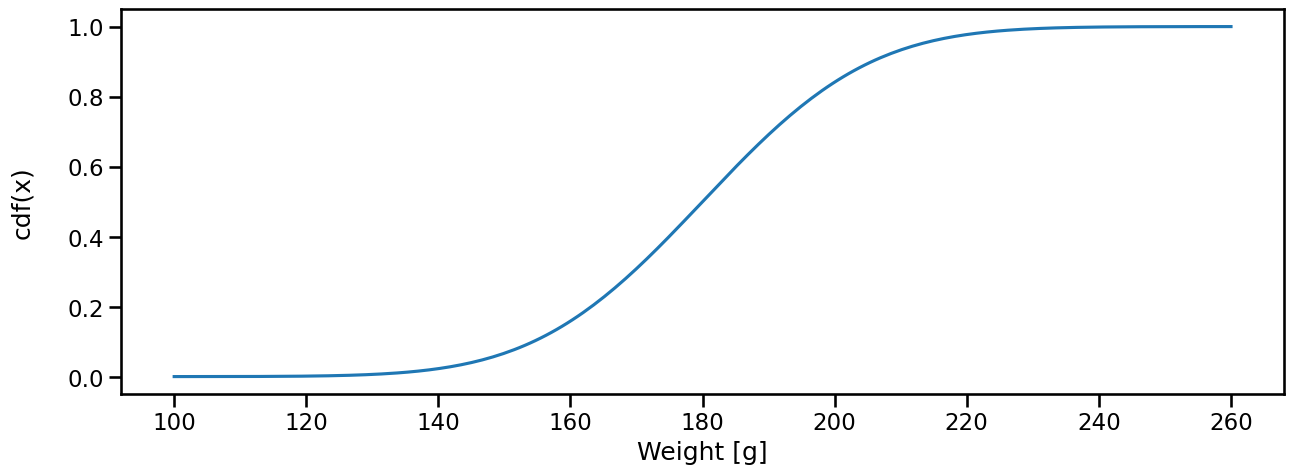

In [49]:
figure1()

In [50]:
def figure1():
    import scipy.stats as st

    plt.figure(figsize=[15,5])

    x1 = np.linspace(m-4*s,m+4*s,100)
    plt.plot(x1,f(x1,180,20.));
    plt.xlabel("x = masse [g]");
    bins=np.linspace(175,200,6)
    x2 = np.linspace(175,200,50)
    plt.bar(x2,f(x2,m,s))
    plt.ylabel('pdf(x)')

    plt.figure(figsize=[15,5])
    x1 = np.linspace(m-4*s,m+4*s,200)

    plt.plot(x1,st.norm.cdf((x1-m)/s));
    plt.xlabel('Weight [g]')
    plt.ylabel('cdf(x)\n ')
    bounds = np.array([175,200])
    cdf = st.norm.cdf((bounds-m)/s)
    plt.scatter(bounds,cdf);
    plt.plot([100,bounds[0]],[cdf[0],cdf[0]],'k')
    plt.plot([100,bounds[1]],[cdf[1],cdf[1]],'k')
    plt.plot([bounds[0],bounds[0]],[0,cdf[0]],'k')
    plt.plot([bounds[1],bounds[1]],[0,cdf[1]],'k')
    plt.text(95,cdf[0]+0.03,'{:.4f}'.format(cdf[0]));
    plt.text(95,cdf[1]+0.03,'{:.4f}'.format(cdf[1]));

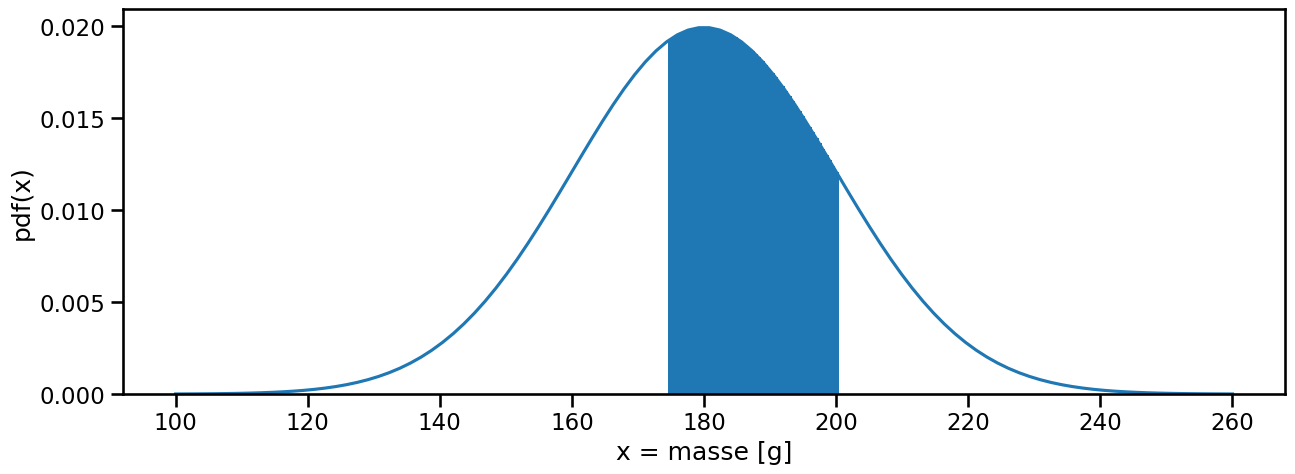

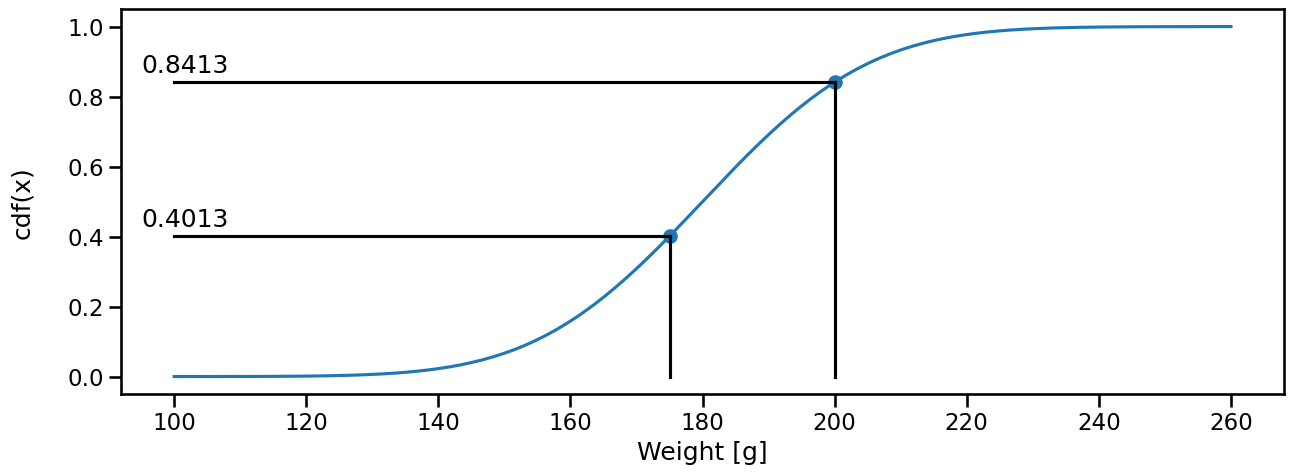

In [51]:
figure1()

#### Avec F(x)

In [52]:
print('cdf[1]-cdf[0] = {:.6f}'.format(cdf[1]-cdf[0]))

TypeError: 'function' object is not subscriptable

#### Dans les tables de variable normale réduite: 

$p(175<x<200) = p(\frac{175-180}{20}<t<\frac{200-180}{20}) = p(-0.25<t<1)$

0.0987 + 0.3413 = 0.44

# Merci !